In [30]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as patches
from matplotlib.patches import Circle as circle


# Files to Load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"


# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset with a merge
pyber = pd.merge(city_data, ride_data, how="outer", on=["city", "city"])


# Establish global variables/ calculations for use later
total_fare = pyber["fare"].sum()
total_rides = pyber["ride_id"].nunique()
total_drivers = pyber.groupby(["city"])["driver_count"].median().sum()
#total_drivers = pyber["driver_count"].unique()


# Display the data table for preview
pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [31]:
# Check data tyoes to make sure nothing needs to be converted for later calculations
pyber.dtypes

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

In [32]:
# Group the original data by type and city
type_city_group = pyber.groupby(["type", "city"])


# Perform calculations and assignment for the Bubble Plot of Ride Sharing Data
total_rides_per_city = type_city_group["ride_id"].nunique()

average_fare_per_city = type_city_group["fare"].sum()/ total_rides_per_city

driver_count_per_city = type_city_group["driver_count"].mean()



# Make dataframe
bubble_data = pd.DataFrame({"Average Fare $" : average_fare_per_city,
                            "Total Number of Rides (Per City)" : total_rides_per_city,
                            "Driver Count" : driver_count_per_city
                          })



# Reset index and check the bubble_data_DF
bubble_data_reset_df = bubble_data.reset_index()
bubble_data_reset_df.head()



,type,city,Average Fare $,Total Number of Rides (Per City),Driver Count
0,Rural,Bradshawfurt,40.064000,10,7
1,Rural,Garzaport,24.123333,3,7
2,Rural,Harringtonfort,33.470000,6,4
3,Rural,Jessicaport,36.013333,6,1
4,Rural,Lake Jamie,34.358333,6,4


In [33]:
# Make empty list to be loaded in the for loop further down
colors_list = []
type_list = []
bb_color_list = []


# For loop to ittereate through the bubble_data_reset_df and append the appropriate colors to the colors_list according to type
# This loop also checks to see if the tyoe and color are loaded into the type_list and bb_color_list and it not,
# it loads them into the respective empty list
# This is for use in our city type legend later on
for type in bubble_data_reset_df["type"]:
    
    if type == "Rural":
        colors_list.append("Gold")
        if "Gold" not in bb_color_list:
            bb_color_list.append("Gold")
            type_list.append(type)
        
    elif type == "Urban":
        colors_list.append("Coral")
        if "Coral" not in bb_color_list:
            bb_color_list.append("Coral")
            type_list.append(type)
    else:
        colors_list.append("SkyBlue")
        if "SkyBlue" not in bb_color_list:
            bb_color_list.append("SkyBlue")
            type_list.append(type)
    
    

In [34]:
# Add the color_list to our bubble_data_reset_df for use later on with our plotting
bubble_data_reset_df["Color"] = colors_list


# Check to make sure the "Colors" column got added correctly
bubble_data_reset_df.head()

,type,city,Average Fare $,Total Number of Rides (Per City),Driver Count,Color
0,Rural,Bradshawfurt,40.064000,10,7,Gold
1,Rural,Garzaport,24.123333,3,7,Gold
2,Rural,Harringtonfort,33.470000,6,4,Gold
3,Rural,Jessicaport,36.013333,6,1,Gold
4,Rural,Lake Jamie,34.358333,6,4,Gold


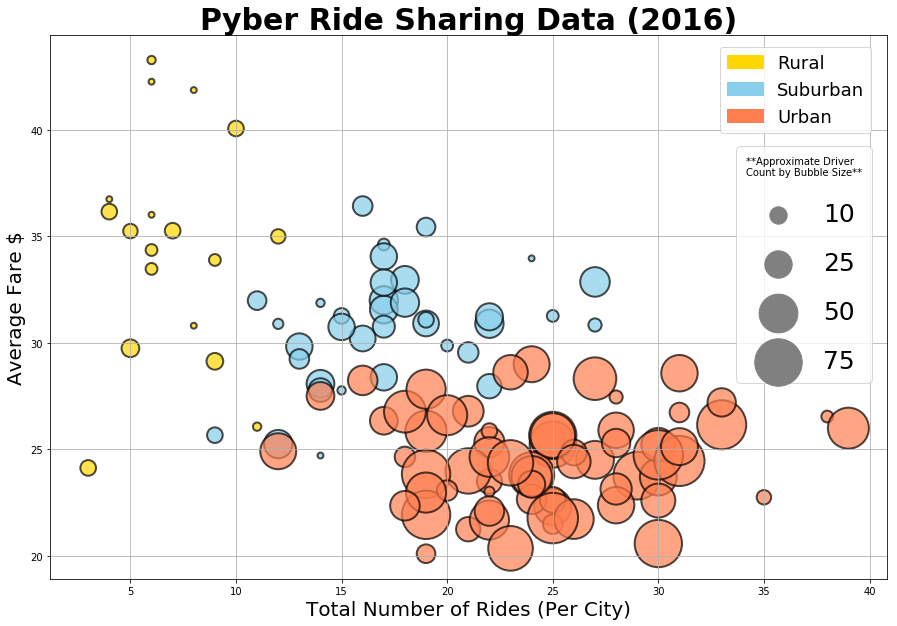

In [35]:
############ In this section I added some enhancements to the bubble chart that made it a little more presentable than_ 
############ the one given to us in the homework example...

# Plotting each group according to the city tyoe and amount of drivers
pyber_bubble = bubble_data_reset_df.plot(kind="scatter", 
                 x="Total Number of Rides (Per City)", 
                 y="Average Fare $",
                 s=bubble_data_reset_df["Driver Count"] * 35, 
                 c= bubble_data_reset_df["Color"],
                 alpha = 0.70,
                 grid=True, 
                 figsize=(15,10), 
                 edgecolors="black", 
                 linewidth=2,
                 
                )


# Set up empty list to be loaded for the legend
lgnd = []


# Itterate through the colors column, append, and patch the data for use in our legened
for i in range(len(bb_color_list)):
    
    lgnd.append(patches.Patch(color = bb_color_list[i],
                              alpha = 1,
                              label = type_list[i]
                              ))
    
    
# Another for loop to creat my bubble size legend
# Here I am just creating a scatter reference for my plt.legend funtion below
# I assigned two empty list to the X an Y coordinace so nothing plots on the chart as actual data
for drivers in [10, 25, 50, 75]:
    new_size = drivers * 30
    plt.scatter([], [], color = "grey", alpha = 1, s = new_size, label = str(drivers))
    
    
# Create and format the legend to explain the bubble sizes    
bubble_size_legend = plt.legend(scatterpoints = 1, frameon = True, labelspacing =1 , 
                                title = "**Approximate Driver\nCount by Bubble Size**",
                                loc = (.82, .36), prop={'size': 25})


# Plot the city type legend
plt.legend(handles = lgnd, scatterpoints = 1,  loc = (.8, .82), prop={'size': 18})


# Add the bubble legend to the chart with the add_artist function so it doesn't get overidden by the city type legend 
plt.gca().add_artist(bubble_size_legend)


# Override the labeling in the chart so I can change the font sizes accordingly
plt.xlabel("Total Number of Rides (Per City)", fontsize = 20)
plt.ylabel("Average Fare $", fontsize = 20)
plt.title("Pyber Ride Sharing Data (2016)", fontsize = 30, fontweight="bold")


# Save chart to output file
plt.savefig("Bubble_Pyber.png")



In [36]:
# Group the original data by city type
city_type_group = pyber.groupby(["type"])


# Perform calculations and assignment for % of fare by city type and store it into a DF
total_fare_by_city_percent = (city_type_group["fare"].sum()/ total_fare) * 100

fares_by_city_df = pd.DataFrame({"Percent of Total Fares" : total_fare_by_city_percent
                    })


# Reset index of our DF
fares_by_city_reset_df = fares_by_city_df.reset_index()


# Convert the tyoes and % fare into a list for later use with our pie chart
fare_list = list(fares_by_city_reset_df["Percent of Total Fares"])
type_list_fare = list(fares_by_city_reset_df["type"])

In [37]:
# Load variables for the Fares by City Type pie chart
fares_by_city_chart_lables = type_list_fare
fares_by_city_chart_values = fare_list 
fares_by_city_chart_colors = ["Gold", "SkyBlue", "Coral"]
fares_by_city_chart_explode = (0,0,0.2)

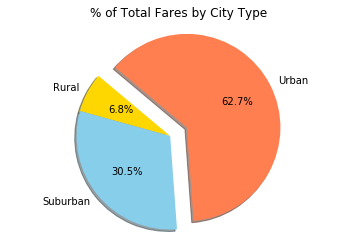

In [38]:
# Create, format, and plot the Fares by City Type pie chart
plt.pie(fares_by_city_chart_values, explode=fares_by_city_chart_explode, 
        labels=fares_by_city_chart_lables, colors=fares_by_city_chart_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


#Create the title for our Fares by City pie chart
plt.title("% of Total Fares by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")


# Save an image of our Fares by City Type pie chart 
plt.savefig("Pie_Fares.png")

In [39]:
# Perform calculations and assignment for % of rides by city type and store it into a DF
total_rides_by_city_percent = (city_type_group["ride_id"].nunique()/ total_rides) * 100

rides_by_city_df = pd.DataFrame({"Percent of Total Rides" : total_rides_by_city_percent
                    })


# Reset index of our DF
rides_by_city_reset_df = rides_by_city_df.reset_index()


# Convert the types and % rides into a list for later use with our pie chart
rides_list = list(rides_by_city_reset_df["Percent of Total Rides"])
type_list_rides = list(rides_by_city_reset_df["type"])

In [40]:
# Load variables for the Rides by City Type pie chart
rides_by_city_chart_lables = type_list_rides
rides_by_city_chart_values = rides_list 
rides_by_city_chart_colors = ["Gold", "SkyBlue", "Coral"]
rides_by_city_chart_explode = (0,0,0.2)

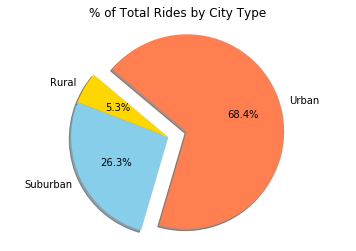

In [41]:
# Create, format, and plot the Rides by City Type pie chart
plt.pie(rides_by_city_chart_values, explode=rides_by_city_chart_explode, 
        labels=rides_by_city_chart_lables, colors=rides_by_city_chart_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


#Create the title for our Rides by City pie chart
plt.title("% of Total Rides by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our Rides by City Type pie chart
plt.savefig("Pie_Rides.png")

In [42]:
# The total drivers pie chart was a little more difficult since we have static/ duplicate values for the drivers per city_
# if there were multiple rides in any particular city...
# I did calculations based off ot the grouping I did for the bubble chart above and assigned them to variables
rural_drivers_total = bubble_data_reset_df[bubble_data_reset_df["type"] == "Rural"].sum()["Driver Count"]
rural_drivers_percent = rural_drivers_total/ total_drivers

suburban_drivers_total = bubble_data_reset_df[bubble_data_reset_df["type"] == "Suburban"].sum()["Driver Count"]
suburban_drivers_percent = suburban_drivers_total/ total_drivers

urban_drivers_total = bubble_data_reset_df[bubble_data_reset_df["type"] == "Urban"].sum()["Driver Count"]
urban_drivers_percent = urban_drivers_total/ total_drivers


# Store my percentage calculation into lists for use later on in my Drivers by City Type pie chart
drivers_list = [rural_drivers_percent, suburban_drivers_percent, urban_drivers_percent]
type_list_drivers = ["Rural", "Suburban", "Urban"]

In [43]:
# Load variables for the Drivers by City Type pie chart
drivers_by_city_chart_lables = type_list_drivers
drivers_by_city_chart_values = drivers_list 
drivers_by_city_chart_colors = ["Gold", "SkyBlue", "Coral"]
drivers_by_city_chart_explode = (0,0,0.2)

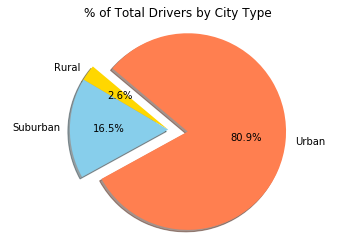

In [44]:
# Create, format, and plot the Drivers by City Type pie chart
plt.pie(drivers_by_city_chart_values, explode=drivers_by_city_chart_explode, 
        labels=drivers_by_city_chart_lables, colors=drivers_by_city_chart_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


#Create the title for our Drivers by City Type pie chart
plt.title("% of Total Drivers by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")


# Save an image of our Drivers by City Type pie chart
plt.savefig("Pie_Drivers.png")